In [1]:
import keras
from keras.datasets import imdb

In [2]:
keras.__version__

'2.5.0'

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [4]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
train_data[0], train_labels[0]

In [6]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
# Preparing the data
# Encoding the integer sequences into a binary matrix ( One-hot Encode lists to turn them into vectors of 0's & 1's

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


x_train = vectorize_sequences(train_data)       # vectorize train data
x_test = vectorize_sequences(test_data)         # vectorize test data



In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# Vectorizing the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


### Now data is ready to feed into Neural network

In [11]:
# Model definition

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


# Compile the model by choosig a Loss function & Optimizer
# Problem is Binary classification so Loss function - 'bianry_crossentropy' & optimizer='rmsprop'
# and metrics='accuracy'
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



# Validating your approach
# Create a validation set by setting 10000 samples apart from training set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]



# Training the model, & validating it on validation set
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 16s 45ms/step - loss: 0.5906 - accuracy: 0.6989 - val_loss: 0.4073 - val_accuracy: 0.8384
Epoch 2/10
30/30 [==============================] - 1s 18ms/step - loss: 0.3173 - accuracy: 0.9068 - val_loss: 0.3051 - val_accuracy: 0.8897
Epoch 3/10
30/30 [==============================] - 1s 18ms/step - loss: 0.2239 - accuracy: 0.9338 - val_loss: 0.2888 - val_accuracy: 0.8854
Epoch 4/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1833 - accuracy: 0.9426 - val_loss: 0.3044 - val_accuracy: 0.8798
Epoch 5/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1395 - accuracy: 0.9588 - val_loss: 0.2953 - val_accuracy: 0.8805
Epoch 6/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1109 - accuracy: 0.9676 - val_loss: 0.2945 - val_accuracy: 0.8868
Epoch 7/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0899 - accuracy: 0.9771 - val_loss: 0.3126 - val_accuracy: 0.8830
Epoch 8/10
3

In [12]:
# Configuring the optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [13]:
# Using custom losses & metrics
# from keras import metrics, losses
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.accuracy])

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

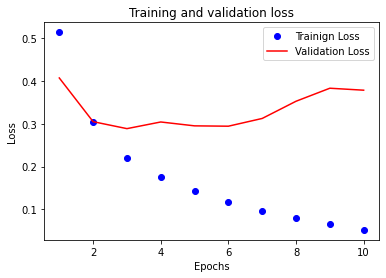

In [15]:
# Plotting the training & Validation loss

import matplotlib.pyplot as plt

history_dictory = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Trainign Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

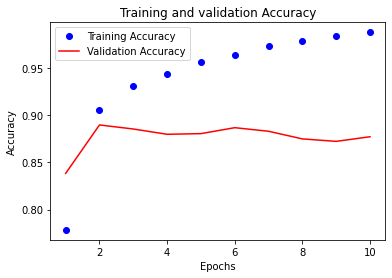

In [16]:
# Plotting training & validation Accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
## Retraining a model from scratch for epochs = 4 & then evaluate on test data

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5897 - accuracy: 0.7002
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2997 - accuracy: 0.9121
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2006 - accuracy: 0.9364
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3122 - accuracy: 0.8804


In [18]:
results

[0.3122401833534241, 0.8804399967193604]

In [19]:
# Use trained network to predict on new data
model.predict(x_test)

array([[0.17510065],
       [0.99999595],
       [0.9376279 ],
       ...,
       [0.20426147],
       [0.10548656],
       [0.7675203 ]], dtype=float32)